['img', 'msk']
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
sentinel12_s2_12_msk_10.tif


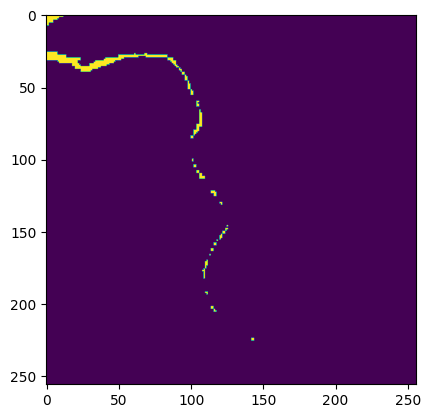

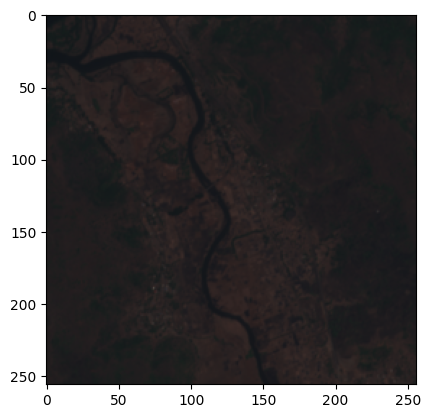

(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
sentinel12_s2_12_msk_1005.tif


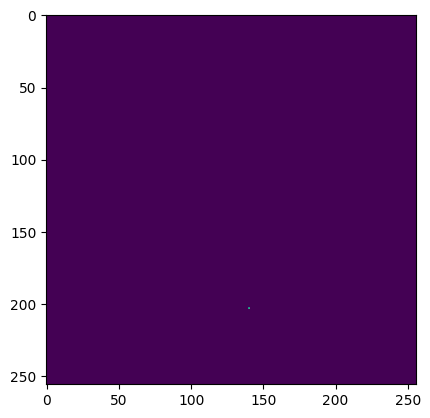

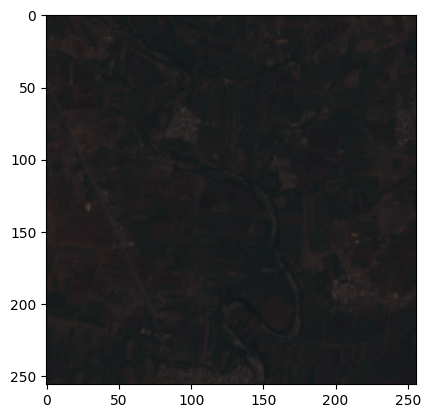

(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
(256, 256, 3)
Num img bands: (1, 2, 3, 4, 5, 6, 7)
sentinel12_s2_12_msk_1007.tif


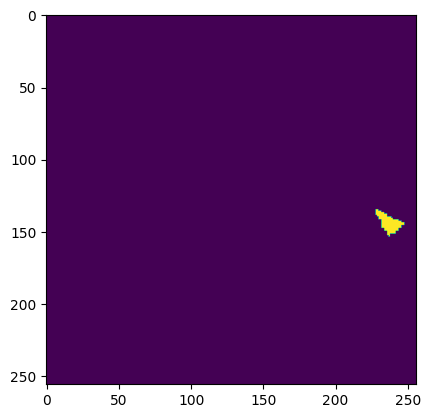

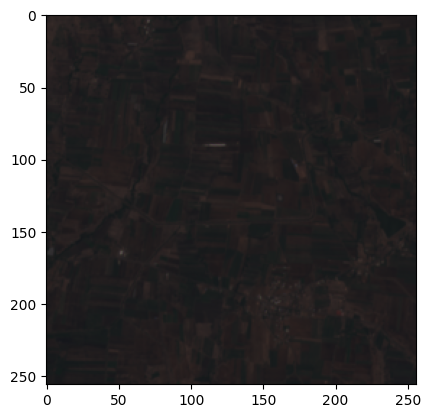

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio

path = './data_prepped/train/'
print(os.listdir(path))
mask_folder = os.path.join(path, 'msk')
mask_files = sorted(os.listdir(mask_folder))
j = 0
for i in range(20):
    mask_path = os.path.join(mask_folder, mask_files[i])
    if os.path.isdir(mask_path):
        continue
    mask_data = rasterio.open(mask_path)
    
    mask = mask_data.read(1).astype(np.float32)

    img_data = rasterio.open(mask_path.replace('msk', 'img'))
    b, g, r, nir, swir1, swir2, slope  = img_data.read()
    rgb_img = np.stack((r,g,b), axis = -1).astype(np.float32)
    print(rgb_img.shape)
    print('Num img bands:', img_data.indexes)
    if np.sum(mask==1) > 0:
        print(mask_files[i])
        # print(np.where(mask==1))
        plt.imshow(mask)
        plt.show()
        plt.imshow(rgb_img)
        plt.show()
        j += 1
        if j == 3:
            break

### Image bands: "Blue": 0, "Green": 1, "Red": 2, "NIR": 3, "SWIR1": 4, "SWIR2": 5

In [2]:
b, g, r, nir, swir1, swir2, slope  = img_data.read()

In [3]:
andwi = (b+g+r-nir-swir1-swir2) / (b+g+r+nir+swir1+swir2)
ndwi = (g-nir)/(g+nir)
andwi

array([[ 0.30724794,  0.30623016,  0.31538665, ..., -0.2377905 ,
        -0.21703777, -0.23984428],
       [ 0.31126878,  0.30985546,  0.3160127 , ..., -0.28666148,
        -0.24985942, -0.24492638],
       [ 0.3113207 ,  0.30443975,  0.30254772, ..., -0.25759465,
        -0.23636723, -0.24071114],
       ...,
       [-0.30783206, -0.31162342, -0.29638007, ..., -0.25183624,
        -0.26154697, -0.31614333],
       [-0.31760362, -0.31874937, -0.30266663, ..., -0.28335345,
        -0.3014949 , -0.3319908 ],
       [-0.30127767, -0.30431405, -0.3010783 , ..., -0.31877574,
        -0.3237078 , -0.32650375]], dtype=float32)

In [4]:
ndwi >= 0.3

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
import ukis_metrics.seg_metrics as segm
# tpfptnfn = segm.tpfptnfn(y_true, y_pred, None)
# metrics = segm.segmentation_metrics(tpfptnfn)

tpfptnfn = segm.tpfptnfn(mask == 1, ndwi >= 0.3, None)
metrics = segm.segmentation_metrics(tpfptnfn)

In [6]:
metrics

{'iou': 0.0,
 'recall': 0.0,
 'precision': 0.0,
 'acc': 0.9912,
 'F1': 0.0,
 'kappa': 0.0}

In [8]:
img_data.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 256,
 'height': 256,
 'count': 7,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [9]:
img_data.bounds

BoundingBox(left=0.0, bottom=256.0, right=256.0, top=0.0)

In [10]:
img_data.width, img_data.height

(256, 256)